In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
movies_data = pd.read_csv('movie_metadata.csv')
movies_data.head(3)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000


In [389]:
movies_data.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Columns: 28 entries, color to movie_facebook_likes
dtypes: float64(13), int64(3), object(12)
memory usage: 866.8+ KB


In [390]:
movies_data = movies_data.drop(['color','num_critic_for_reviews','actor_3_facebook_likes','actor_1_facebook_likes','actor_2_facebook_likes','aspect_ratio'],axis=1)
#movies_data.head(3)

In [391]:
movies_data = movies_data.dropna()
#movies_data.head(3)

<h3>Sum of the Gross income earned by Director/Actor movies </h3>

In [58]:
def CalculateGrossCollection(name,movies_data,number):
    
    name_count_pairs = movies_data[name].value_counts().to_dict()
    name_movies_df = movies_data.groupby(name,as_index=False)

    name_movies_df = name_movies_df.sum() 
    name_movies_df['films'] = name_movies_df[name].map(name_count_pairs)
    name_movies_df.sort_values('gross',ascending=False,inplace=True)

    name_movies_df[name] = name_movies_df[name].map(str) + " (" + name_movies_df['films'].astype(str) + ")"
    collection_series = name_movies_df[name_movies_df['films'] > number][[name,'gross']].head(10).set_index(name)
    return collection_series

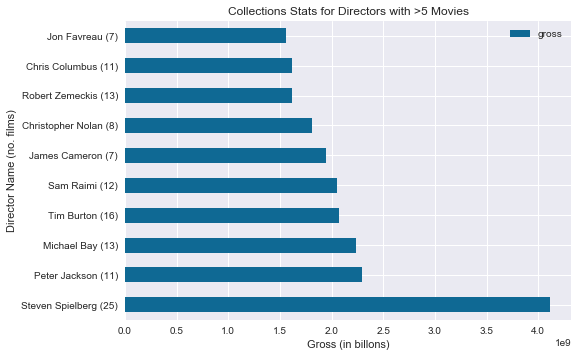

In [407]:
CalculateGrossCollection('director_name',movies_data,5).plot(kind='barh', color='#0f6994')
plt.ylabel("Director Name (no. films)")
plt.xlabel("Gross (in billons)")
plt.title('Collections Stats for Directors with >5 Movies')
plt.show()

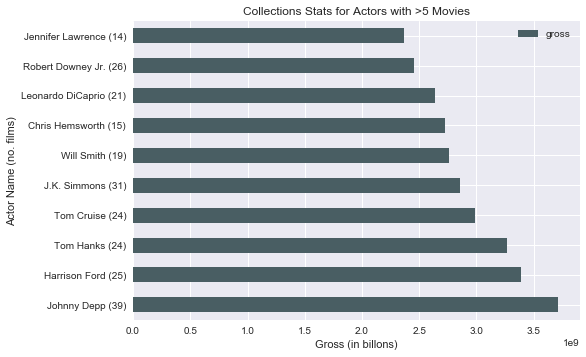

In [410]:
CalculateGrossCollection('actor_1_name',movies_data,10).plot(kind='barh', color='#495e63')
plt.ylabel("Actor Name (no. films)")
plt.xlabel("Gross (in billons)")
plt.title('Collections Stats for Actors with >5 Movies')
plt.show()

In [61]:
movies_data.head()

,director_name,duration,director_facebook_likes,actor_2_name,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,...,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,imdb_score,movie_facebook_likes
0,James Cameron,178.0,0.0,Joel David Moore,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,...,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,7.9,33000
1,Gore Verbinski,169.0,563.0,Orlando Bloom,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,...,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,7.1,0
2,Sam Mendes,148.0,0.0,Rory Kinnear,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,...,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,6.8,85000
3,Christopher Nolan,164.0,22000.0,Christian Bale,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,...,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,8.5,164000
5,Andrew Stanton,132.0,475.0,Samantha Morton,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,...,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012.0,6.6,24000


In [67]:
genre = 'Action|Adventure|Fantasy|Sci-Fi'
list_of_genres = genre.split('|')
list_of_genres

['Action', 'Adventure', 'Fantasy', 'Sci-Fi']

In [110]:
movies_genres = pd.DataFrame(movies_data['genres'])
#list_of_movies = movies_data['genres'].str.split('|')
#list_of_movies = movies_data['genres'].str.split('|')
movies_data['genres'] = movies_data['genres'].str.split('|')
#movies_genres['Length'] = len(movies_data['genres'].str.split('|'))
#movies_genres['count_of_genre'] = len(movies_data['genres'])

#list_of_movies
movies_data

,director_name,duration,director_facebook_likes,actor_2_name,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,...,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,imdb_score,movie_facebook_likes
0,James Cameron,178.0,0.0,Joel David Moore,760505847.0,"[Action, Adventure, Fantasy, Sci-Fi]",CCH Pounder,Avatar,886204,4834,...,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,7.9,33000
1,Gore Verbinski,169.0,563.0,Orlando Bloom,309404152.0,"[Action, Adventure, Fantasy]",Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,...,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,7.1,0
2,Sam Mendes,148.0,0.0,Rory Kinnear,200074175.0,"[Action, Adventure, Thriller]",Christoph Waltz,Spectre,275868,11700,...,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,6.8,85000
3,Christopher Nolan,164.0,22000.0,Christian Bale,448130642.0,"[Action, Thriller]",Tom Hardy,The Dark Knight Rises,1144337,106759,...,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,8.5,164000
5,Andrew Stanton,132.0,475.0,Samantha Morton,73058679.0,"[Action, Adventure, Sci-Fi]",Daryl Sabara,John Carter,212204,1873,...,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012.0,6.6,24000
6,Sam Raimi,156.0,0.0,James Franco,336530303.0,"[Action, Adventure, Romance]",J.K. Simmons,Spider-Man 3,383056,46055,...,sandman|spider man|symbiote|venom|villain,http://www.imdb.com/title/tt0413300/?ref_=fn_t...,1902.0,English,USA,PG-13,258000000.0,2007.0,6.2,0
7,Nathan Greno,100.0,15.0,Donna Murphy,200807262.0,"[Adventure, Animation, Comedy, Family, Fantasy...",Brad Garrett,Tangled,294810,2036,...,17th century|based on fairy tale|disney|flower...,http://www.imdb.com/title/tt0398286/?ref_=fn_t...,387.0,English,USA,PG,260000000.0,2010.0,7.8,29000
8,Joss Whedon,141.0,0.0,Robert Downey Jr.,458991599.0,"[Action, Adventure, Sci-Fi]",Chris Hemsworth,Avengers: Age of Ultron,462669,92000,...,artificial intelligence|based on comic book|ca...,http://www.imdb.com/title/tt2395427/?ref_=fn_t...,1117.0,English,USA,PG-13,250000000.0,2015.0,7.5,118000
9,David Yates,153.0,282.0,Daniel Radcliffe,301956980.0,"[Adventure, Family, Fantasy, Mystery]",Alan Rickman,Harry Potter and the Half-Blood Prince,321795,58753,...,blood|book|love|potion|professor,http://www.imdb.com/title/tt0417741/?ref_=fn_t...,973.0,English,UK,PG,250000000.0,2009.0,7.5,10000
10,Zack Snyder,183.0,0.0,Lauren Cohan,330249062.0,"[Action, Adventure, Sci-Fi]",Henry Cavill,Batman v Superman: Dawn of Justice,371639,24450,...,based on comic book|batman|sequel to a reboot|...,http://www.imdb.com/title/tt2975590/?ref_=fn_t...,3018.0,English,USA,PG-13,250000000.0,2016.0,6.9,197000


In [399]:
#Assigning a Categorical rating based on the IMDB Score
movies_data['rating'] = np.where(movies_data['imdb_score'] >= 8.0,'Good','')
movies_data['rating'] = np.where((movies_data['imdb_score'] < 8.0),'Average',movies_data['rating'])
movies_data['rating'] = np.where((movies_data['imdb_score'] <= 5.0),'Bad',movies_data['rating'])

In [400]:
movies_data.head(3)

,director_name,duration,director_facebook_likes,actor_2_name,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,...,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,imdb_score,movie_facebook_likes,rating
0,James Cameron,178.0,0.0,Joel David Moore,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,...,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,7.9,33000,Average
1,Gore Verbinski,169.0,563.0,Orlando Bloom,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,7.1,0,Average
2,Sam Mendes,148.0,0.0,Rory Kinnear,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,...,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,6.8,85000,Average


In [401]:
directors_count =  movies_data['director_name'].value_counts()
directors_count_more_than_10 = directors_count[directors_count > 10]

In [405]:
movies_data_pivot = movies_data.pivot_table('gross', aggfunc='sum', index=['director_name'], columns='rating')
new_movies = movies_data_pivot.loc[directors_count_more_than_15.index]
new_movies.fillna(0)

rating,Average,Bad,Good
Steven Spielberg,2.581281e+09,0.0,1.532952e+09
Clint Eastwood,9.385199e+08,0.0,4.398012e+08
Woody Allen,2.691454e+08,0.0,3.920000e+07
Ridley Scott,8.157698e+08,0.0,5.220019e+08
Steven Soderbergh,1.048223e+09,2506446.0,0.000000e+00
Martin Scorsese,4.480813e+08,0.0,4.665285e+08
Tim Burton,2.005018e+09,0.0,6.625700e+07
Spike Lee,3.235974e+08,4903000.0,0.000000e+00
Renny Harlin,4.725378e+08,51438148.0,0.000000e+00
Robert Rodriguez,3.798929e+08,210390857.0,0.000000e+00


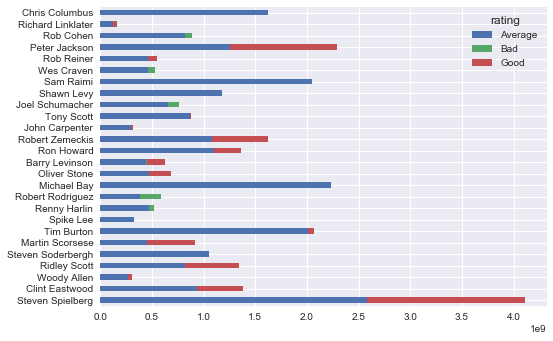

In [406]:
new_movies.plot(kind='barh',stacked=True)
plt.show()

In [382]:
directors_count =  movies_data['director_name'].value_counts()
directors_count_more_than_5 = directors_count[directors_count > 5]

movies_data_directors = movies_data[['director_name','imdb_score']].sort_values('director_name')
movies_data_directors_mean = movies_data_directors.groupby('director_name').mean()
top_directors = movies_data_directors_mean.loc[directors_count_more_than_5.index].sort_values('imdb_score',ascending=False).head(10)

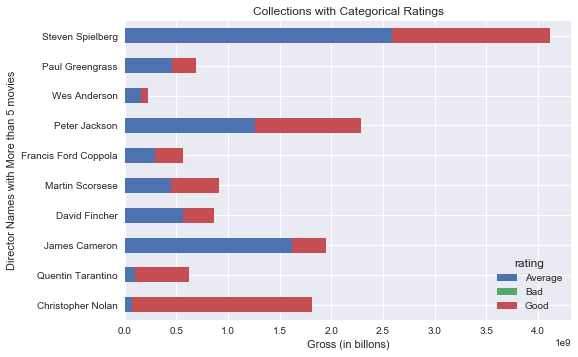

In [385]:
movies_of_top_directors = movies_data_pivot.loc[top_directors.index]
movies_of_top_directors.plot(kind='barh',stacked=True)
plt.ylabel('Director Names with More than 5 movies')
plt.xlabel("Gross (in billons)")
plt.title('Collections with Categorical Ratings')
plt.show()